## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [9]:
df = pd.read_csv("QueryResults.csv", names = ["DATE", "TAG", "POSTS"], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [10]:
pd.concat([df.head(), df.tail()])

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,505
4,2008-08-01 00:00:00,c++,164
2407,2023-01-01 00:00:00,php,3417
2408,2023-01-01 00:00:00,python,19027
2409,2023-01-01 00:00:00,r,3835
2410,2023-01-01 00:00:00,ruby,381
2411,2023-01-01 00:00:00,swift,1544


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [12]:
df.shape

(2412, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [11]:
df.count()

DATE     2412
TAG      2412
POSTS    2412
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [19]:
df.groupby("TAG").sum()

,POSTS
TAG,
assembly,42127
c,392287
c#,1578270
c++,786942
delphi,50482
go,67172
java,1883729
javascript,2468156
perl,67450


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [20]:
df.groupby("TAG").count()

,DATE,POSTS
TAG,,
assembly,174,174
c,174,174
c#,175,175
c++,174,174
delphi,174,174
go,159,159
java,174,174
javascript,174,174
perl,174,174


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [22]:
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164


## Data Manipulation



In [23]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,319.0,1642.0,754.0,104.0,NaN,1129.0,634.0,130.0,476.0,536.0,6.0,287.0,NaN
2008-10-01,16.0,302.0,1988.0,807.0,112.0,NaN,1149.0,723.0,127.0,611.0,507.0,NaN,247.0,NaN
2008-11-01,17.0,259.0,1730.0,734.0,141.0,NaN,956.0,580.0,97.0,500.0,450.0,1.0,158.0,NaN


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [25]:
reshaped_df.shape

(175, 14)

In [27]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [28]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,319.0,1642.0,754.0,104.0,NaN,1129.0,634.0,130.0,476.0,536.0,6.0,287.0,NaN
2008-10-01,16.0,302.0,1988.0,807.0,112.0,NaN,1149.0,723.0,127.0,611.0,507.0,NaN,247.0,NaN
2008-11-01,17.0,259.0,1730.0,734.0,141.0,NaN,956.0,580.0,97.0,500.0,450.0,1.0,158.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [29]:
reshaped_df.count()

TAG
assembly      174
c             174
c#            175
c++           174
delphi        174
go            159
java          174
javascript    174
perl          174
php           174
python        174
r             172
ruby          174
swift         166
dtype: int64

In [34]:
reshaped_df.fillna(0, inplace=True)
reshaped_df.count()

In [35]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,505.0,164.0,14.0,0.0,222.0,163.0,28.0,158.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,319.0,1642.0,754.0,104.0,0.0,1129.0,634.0,130.0,476.0,536.0,6.0,287.0,0.0
2008-10-01,16.0,302.0,1988.0,807.0,112.0,0.0,1149.0,723.0,127.0,611.0,507.0,0.0,247.0,0.0
2008-11-01,17.0,259.0,1730.0,734.0,141.0,0.0,956.0,580.0,97.0,500.0,450.0,1.0,158.0,0.0


## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

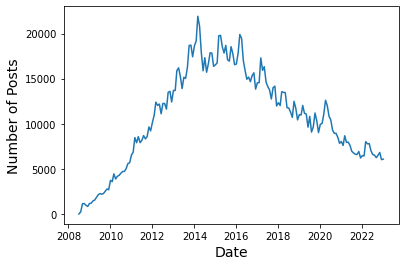

In [65]:
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.plot(reshaped_df.index, reshaped_df.java, label='Java')

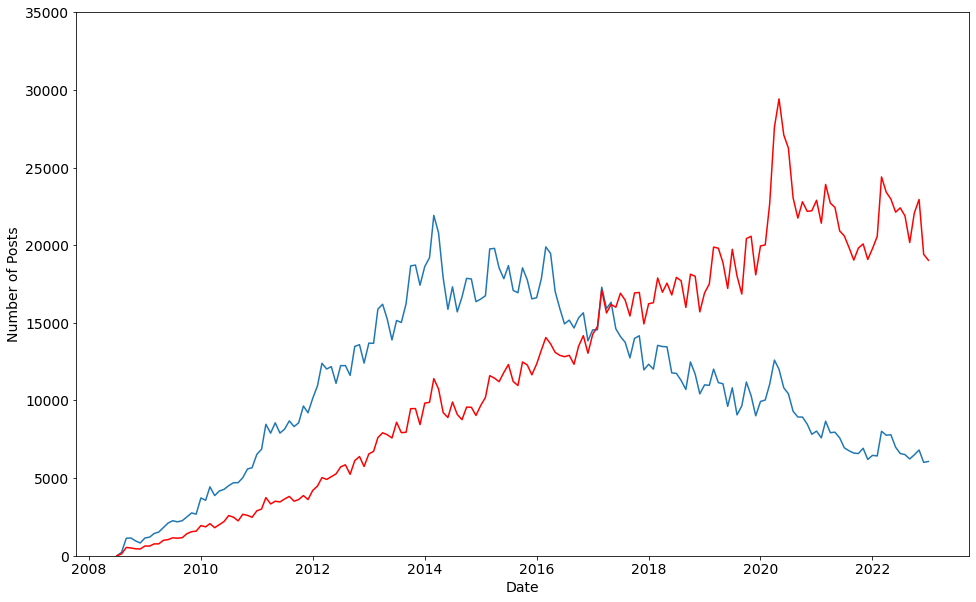

In [63]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.java, label='Java')
plt.plot(reshaped_df.index, reshaped_df.python, label='Python', color='red')

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

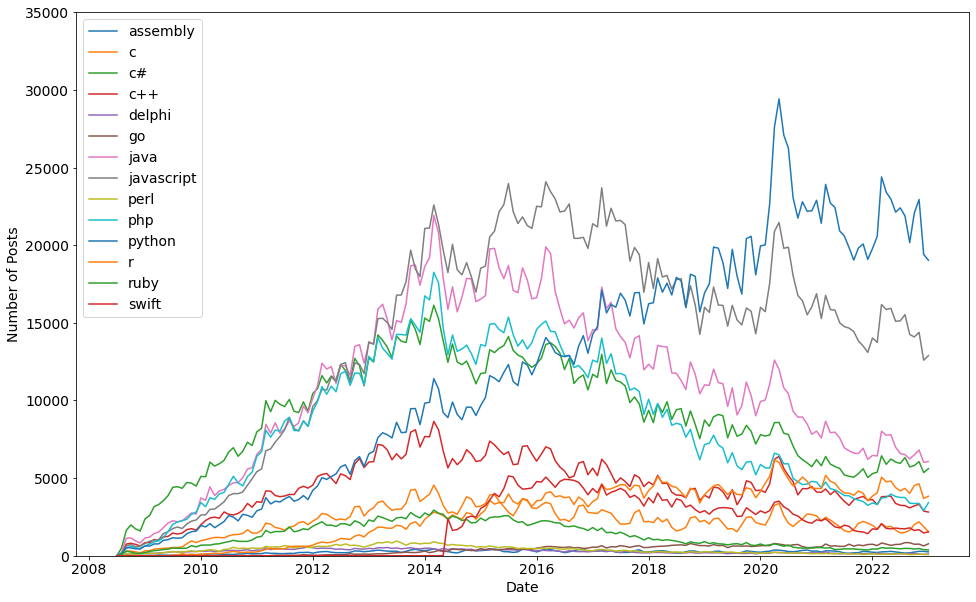

In [71]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
for column in reshaped_df.columns:
  plt.plot(reshaped_df.index, reshaped_df[column], 
           label=reshaped_df[column].name)
plt.legend(fontsize=14)

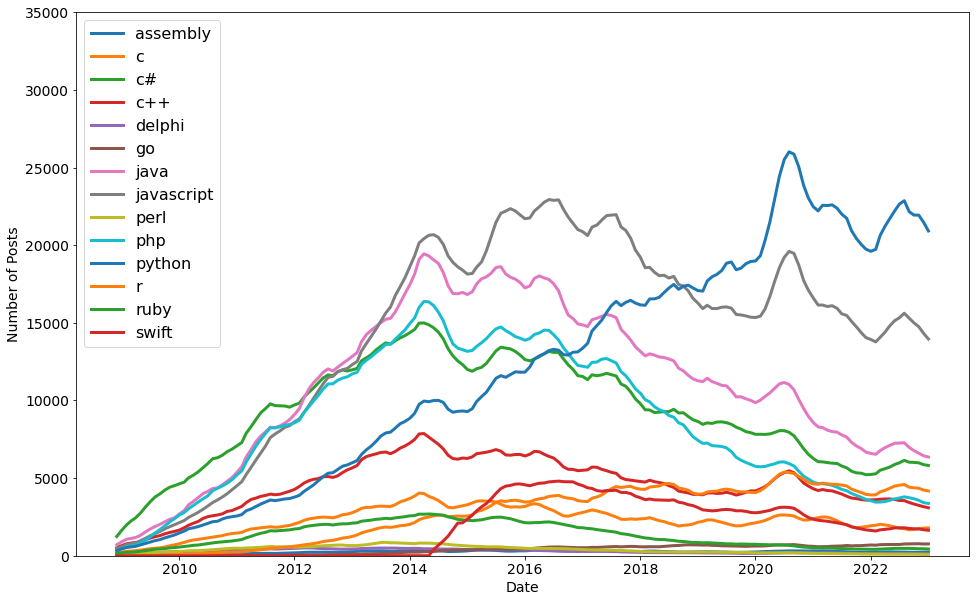

In [70]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
  plt.plot(roll_df.index, roll_df[column],
           linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)